In [1]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from pymystem3 import Mystem
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from string import punctuation
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score
import joblib
#nltk.download("stopwords")

mystem = Mystem() 
russian_stopwords = stopwords.words("russian")

In [2]:
 # сброс ограничений на количество выводимых рядов
pd.set_option('display.max_rows', None)

 # сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)

 # сброс ограничений на количество символов в записи
pd.set_option('display.max_colwidth', None)

In [3]:
# with open("test.csv" , encoding="utf-8") as f: 
#     data=f.read()

In [4]:
# data[:1000]

In [5]:
# data = data.replace("<review>","")
# data = data.replace("</review>","")
# data = data.split("\n\n")
# data[:2]

In [6]:
# df=pd.DataFrame({"text":data, "label":[0]*len(data)})
# df.text=df.text.apply(lambda x: x.replace('\n',''))
# df.to_excel("data.xlsx",index=False)

In [7]:
df=pd.read_excel('data.xlsx')
print(df.shape)
df.head(2)

(101, 2)


,text,label
0,"Ужасно слабый аккумулятор, это основной минус этого аппарата, разряжается буквально за пару часов при включенном wifi и на макс подсветке, например если играть или смотреть видео, следовательно использовать можно только если есть постоянная возможность подзарядиться. Качества звука через динамик далеко не на высоте.Наблюдаются незначительные тормоза в некоторых приложениях и вообще в меню. Очень мало встроенной памяти, а приложения устанавливаются именно туда, с этим связанны неудобства - нужно постоянно переносить их на карту памяти.Несколько неудобно что нету отдельной кнопки для фото. Подумываю купить батарею большей емкость мб что нибудь измениться.",0
1,"ценанадежность-неубиваемостьдолго держит батарею 4 дня стабильно как телефон, 3-4 как плеер если постоянно долбиться в уши и звонить по паре часо на дню, игры и, конечно, смс , в месяц около 200 шт набирается. Максимальное время работы 5 дней в щадящем режиме.2 simqwerty рулит -после нее набор смс на обычных сенсорниках и кнопочных -просто издивательствогромкий ,чистый звук (хорошо варьируется как в + так и в -)значение hot кнопок (верхняя панель до основной раскладки цифры/буквы) задается под себямного цветных панелек с пластиковым защитным экраном,переставляются легко(те родной экран телефона никогда не поцарапается)кнопки не стираютсякак не странно достойные фото, нет не спорю не 25 мегапикселей, но отснять рассписание или конспекты, зафотать пейзаж за окном автобуса получается вполне пристойносохранение файлов,отснятых фото, переброшенных песен происходит на карту памяти и это оч удобно, карточки кушает до 32 Гб !удобный ашевский бонус смс чат с аббанентомт.е. вы можете видеть всю ветку беседы с конкретным человеком , а не искать в куче входящих смс с нужной информацией.работает чисто без галюнов,падал,шврялся,купался,используется как тел и плеер,в метро поездов не слышно уши юзаю сенхайзер 300 и 500,mp3 звонок чистый без сипов.Экран не горилла глас , но на солнце сохраняет читаемость, в отличие от большинства сенсорников , битых пикселей и засветов нет.Самсунговские кверти менее удобные ,пользовалась((( буква ""б"" и "" ь"" просто убивают(((Нокиевская кверти интуитивно понятна и более дружелюбна к пользователю.Подстройка телефона под себя те вынос на экран нужных приложений, перемена значений у кнопок существенно облегчает жизнь.",0


In [8]:
df.isna().sum()

text     1
label    0
dtype: int64

In [9]:
df=df[~df.text.isna()]

In [10]:
df.isna().sum()

text     0
label    0
dtype: int64

# Предобработка

In [11]:
df.text[0]

'Ужасно слабый аккумулятор, это основной минус этого аппарата, разряжается буквально за пару часов при включенном wifi и на макс подсветке, например если играть или смотреть видео, следовательно использовать можно только если есть постоянная возможность подзарядиться. Качества звука через динамик далеко не на высоте.Наблюдаются незначительные тормоза в некоторых приложениях и вообще в меню. Очень мало встроенной памяти, а приложения устанавливаются именно туда, с этим связанны неудобства - нужно постоянно переносить их на карту памяти.Несколько неудобно что нету отдельной кнопки для фото. Подумываю купить батарею большей емкость мб что нибудь измениться.'

In [12]:
def preprocess_text(text):
    tokens = mystem.lemmatize(str(text).lower())
    tokens = [token for token in tokens if token not in russian_stopwords\
              and token != " " \
              and token.strip() not in punctuation]
    
    text = " ".join(tokens)
    
    return text
    
df['prepare_text']=df.text.apply(preprocess_text)
joblib.dump(df,'df.joblib')
df=joblib.load('df.joblib')

In [13]:
df.head(20)

,text,label,prepare_text
0,"Ужасно слабый аккумулятор, это основной минус этого аппарата, разряжается буквально за пару часов при включенном wifi и на макс подсветке, например если играть или смотреть видео, следовательно использовать можно только если есть постоянная возможность подзарядиться. Качества звука через динамик далеко не на высоте.Наблюдаются незначительные тормоза в некоторых приложениях и вообще в меню. Очень мало встроенной памяти, а приложения устанавливаются именно туда, с этим связанны неудобства - нужно постоянно переносить их на карту памяти.Несколько неудобно что нету отдельной кнопки для фото. Подумываю купить батарею большей емкость мб что нибудь измениться.",0,ужасно слабый аккумулятор это основной минус аппарат разряжаться буквально пара час включать wifi макс подсветка например играть смотреть видео следовательно использовать постоянный возможность подзарядиться качество звук динамик далеко высота наблюдаться незначительный тормоз некоторый приложение вообще меню очень мало встроенный память приложение устанавливаться именно туда связанный неудобство нужно постоянно переносить карта память несколько неудобно нету отдельный кнопка фото подумывать купить батарея больший емкость мб изменяться
1,"ценанадежность-неубиваемостьдолго держит батарею 4 дня стабильно как телефон, 3-4 как плеер если постоянно долбиться в уши и звонить по паре часо на дню, игры и, конечно, смс , в месяц около 200 шт набирается. Максимальное время работы 5 дней в щадящем режиме.2 simqwerty рулит -после нее набор смс на обычных сенсорниках и кнопочных -просто издивательствогромкий ,чистый звук (хорошо варьируется как в + так и в -)значение hot кнопок (верхняя панель до основной раскладки цифры/буквы) задается под себямного цветных панелек с пластиковым защитным экраном,переставляются легко(те родной экран телефона никогда не поцарапается)кнопки не стираютсякак не странно достойные фото, нет не спорю не 25 мегапикселей, но отснять рассписание или конспекты, зафотать пейзаж за окном автобуса получается вполне пристойносохранение файлов,отснятых фото, переброшенных песен происходит на карту памяти и это оч удобно, карточки кушает до 32 Гб !удобный ашевский бонус смс чат с аббанентомт.е. вы можете видеть всю ветку беседы с конкретным человеком , а не искать в куче входящих смс с нужной информацией.работает чисто без галюнов,падал,шврялся,купался,используется как тел и плеер,в метро поездов не слышно уши юзаю сенхайзер 300 и 500,mp3 звонок чистый без сипов.Экран не горилла глас , но на солнце сохраняет читаемость, в отличие от большинства сенсорников , битых пикселей и засветов нет.Самсунговские кверти менее удобные ,пользовалась((( буква ""б"" и "" ь"" просто убивают(((Нокиевская кверти интуитивно понятна и более дружелюбна к пользователю.Подстройка телефона под себя те вынос на экран нужных приложений, перемена значений у кнопок существенно облегчает жизнь.",0,ценанадежность неубиваемостьдолго держать батарея 4 день стабильно телефон 3 4 плеер постоянно долбиться ухо звонить пара часо день игра смс месяц около 200 шт набираться максимальный время работа 5 день щадить режим 2 simqwerty рулить набор смс обычный сенсорник кнопочный просто издивательствогромкий чистый звук варьироваться -) значение hot кнопка верхний панель основной раскладка цифра буква задаваться себямный цветной панелька пластиковый защитный экран переставляться легко родной экран телефон поцарапаться кнопка стираютсякак странный достойный фото спорить 25 мегапиксел отснимать рассписание конспект зафотать пейзаж окно автобус получаться вполне пристойносохранение файл отснимать фото перебрасывать песня происходить карта память это оч удобный карточка кушать 32 гб удобный ашевский бонус смс чат аббанентомт е мочь видеть весь ветка беседа конкретный человек искать куча входить смс нужный информация работать чисто галюнов падать шврясться купаться использоваться тело плеер метро поезд слышно ухо юзай сенхайзер 300 500 mp3 звонок чистый сип экран горилла глас солнце сохранят

In [14]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['prepare_text'].values)
X.shape

(100, 2424)

# Кластеризация

In [15]:
silhouettes_score=[]
for n_clusters in range(2,50):
    kmeans = KMeans(n_clusters=n_clusters,random_state=0).fit(X)
    silhouettes_score.append(silhouette_score(X,kmeans.labels_))

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_k

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_k

In [16]:
# plt.grid()
# plt.plot(np.arange(2,50),silhouettes_score)
# plt.show()

In [17]:
kmeans = KMeans(n_clusters=2,random_state=0).fit(X)
df.label=kmeans.labels_

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [18]:
df.label.value_counts()

0    57
1    43
Name: label, dtype: int64

In [19]:
df[df.label==0].text

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

## Понижение размерности

In [20]:
X_embedded = TSNE(n_components=2, learning_rate=100,
                   init='random', perplexity=80, early_exaggeration=50).fit_transform(X)
X_embedded.shape

(100, 2)

In [21]:

from node2vec import Node2Vec
import networkx as nx
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from matplotlib import pyplot as plt, rc, cm# def convert_graph(edgelist,name):
#   graph=nx.Graph()
#   graph.add_weighted_edges_from([tuple(x) for x in edgelist])
#   graph.name = "Covid DisNet for" + " " + name
#   print(nx.info(graph))
#   print("------------------------------------")
#   print("************************************")
#   print("------------------------------------")
#   return graph
  
# graph = convert_graph(X_embedded, "eu email")


# # calculate a starting point for vector_size for node2vec
# vector_size = round(len(graph.nodes)**0.25)


# # use node2vec to get embeddings
# setup = Node2Vec(graph,dimensions=vector_size, walk_length=5, num_walks=5)
# model = setup.fit(window=10, min_count=1)

In [22]:
# fig = plt.figure()
# ax = Axes3D(fig) 

# ax.scatter(X_embedded[:,0], X_embedded[:,1], X_embedded[:,2], marker='o',alpha=0.7,s=200)

# def rotate(angle):
#   ax.view_init(azim=angle)
  
# rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0,362,2),interval=100)
# rot_animation.save('rotation.gif') 
# rot_animation

In [23]:
joblib.dump(X_embedded,'X_embedded.joblib')
joblib.dump(df,'df.joblib')

['df.joblib']

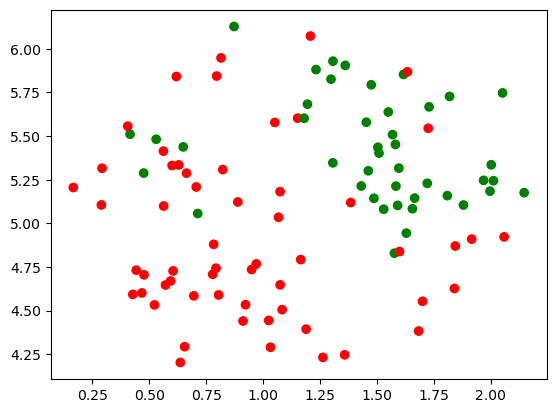

In [24]:
fig = plt.figure()
colors=[ 'r' if i==0 else 'g' for i in df.label.values]
ax = plt.axes()
ax.scatter(X_embedded[:,0], X_embedded[:,1], c=colors)
plt.draw()
# for angle in range(0, 360):
#    ax.view_init(angle, 30)
#    plt.draw()
#    plt.pause(.001)

plt.show()

In [25]:
from dostoevsky.tokenization import RegexTokenizer
from dostoevsky.models import FastTextSocialNetworkModel

In [26]:
tokenizer = RegexTokenizer()
model = FastTextSocialNetworkModel(tokenizer=tokenizer)

In [27]:
messages = df.text

results = model.predict(messages, k=5)

In [28]:
# neutral=[]
# positive=[]
# negative=[]
# for message, sentiment in zip(messages, results):
# #     positive=sentiment['positive']
#     print(message, '=>', sentiment)

In [29]:
# frame=pd.DataFrame(message, sentiment)
frame_m=[]
frame_r=[]
# neutral=[]
positive=[]
negative=[]
for message, sentiment in zip(messages, results):
    frame_m.append(message)
    frame_r.append(sentiment)
    positive.append(sentiment['positive'])
    negative.append(sentiment['negative'])
#     neutral.append(sentiment['neutral'])

In [30]:
frame=pd.DataFrame({"text":frame_m})
frame["sentiment"]=frame_r

In [31]:
frame["positive"]=positive
frame["negative"]=negative
# frame["neutral"]=neutral
# frame["neutral"]=neutral

In [32]:
frame

,text,sentiment,positive,negative
0,"Ужасно слабый аккумулятор, это основной минус этого аппарата, разряжается буквально за пару часов при включенном wifi и на макс подсветке, например если играть или смотреть видео, следовательно использовать можно только если есть постоянная возможность подзарядиться. Качества звука через динамик далеко не на высоте.Наблюдаются незначительные тормоза в некоторых приложениях и вообще в меню. Очень мало встроенной памяти, а приложения устанавливаются именно туда, с этим связанны неудобства - нужно постоянно переносить их на карту памяти.Несколько неудобно что нету отдельной кнопки для фото. Подумываю купить батарею большей емкость мб что нибудь измениться.","{'neutral': 0.6513648629188538, 'negative': 0.1824355274438858, 'skip': 0.08757384121417999, 'positive': 0.08510905504226685, 'speech': 0.005564924795180559}",0.085109,0.182436
1,"ценанадежность-неубиваемостьдолго держит батарею 4 дня стабильно как телефон, 3-4 как плеер если постоянно долбиться в уши и звонить по паре часо на дню, игры и, конечно, смс , в месяц около 200 шт набирается. Максимальное время работы 5 дней в щадящем режиме.2 simqwerty рулит -после нее набор смс на обычных сенсорниках и кнопочных -просто издивательствогромкий ,чистый звук (хорошо варьируется как в + так и в -)значение hot кнопок (верхняя панель до основной раскладки цифры/буквы) задается под себямного цветных панелек с пластиковым защитным экраном,переставляются легко(те родной экран телефона никогда не поцарапается)кнопки не стираютсякак не странно достойные фото, нет не спорю не 25 мегапикселей, но отснять рассписание или конспекты, зафотать пейзаж за окном автобуса получается вполне пристойносохранение файлов,отснятых фото, переброшенных песен происходит на карту памяти и это оч удобно, карточки кушает до 32 Гб !удобный ашевский бонус смс чат с аббанентомт.е. вы можете видеть всю ветку беседы с конкретным человеком , а не искать в куче входящих смс с нужной информацией.работает чисто без галюнов,падал,шврялся,купался,используется как тел и плеер,в метро поездов не слышно уши юзаю сенхайзер 300 и 500,mp3 звонок чистый без сипов.Экран не горилла глас , но на солнце сохраняет читаемость, в отличие от большинства сенсорников , битых пикселей и засветов нет.Самсунговские кверти менее удобные ,пользовалась((( буква ""б"" и "" ь"" просто убивают(((Нокиевская кверти интуитивно понятна и более дружелюбна к пользователю.Подстройка телефона под себя те вынос на экран нужных приложений, перемена значений у кнопок существенно облегчает жизнь.","{'neutral': 0.546748161315918, 'negative': 0.21207880973815918, 'skip': 0.1067005917429924, 'positive': 0.07370626926422119, 'speech': 0.014967083930969238}",0.073706,0.212079
2,"подробнее в комментарияхК сожалению, факт поломки через месяц использования сильно подпортил впечатление от телефона. Попытался установить языковое обновление - в итоге - экран смерти. Отдал в ремонт - сказали, что полетела материнская плата. По сути месяц уже лежит в СЦ. Печальный опыт, больше HTC не куплю.","{'neutral': 0.4688006341457367, 'negative': 0.2814156115055084, 'skip': 0.15611489117145538, 'positive': 0.07370626926422119, 'speech': 0.00507033197209239}",0.073706,0.281416
3,"я любительница громкой музыки. Тише телефона у меня еще не было!! Приложений мало, память маленькая. Толком ни чего скачать не можешь. Вечно приходится что то удалять. Бывало такое что сенсор заедал без особых на то причин. Телефону 1,5 месяца.Есть телефоны намного лучше. НЕ БЕРИТЕ !!! Я пожалела...","{'neutral': 0.2568419873714447, 'negative': 0.23935934901237488, 'skip': 0.22816647589206696, 'positive': 0.1968362182378769, 'speech': 0.0032830648124217987}",0.196836,0.239359
4,"Дата выпуска - 2011 г, емкость - 1430 mAh, технология экрана - TFT, тип экрана - 262 тыс. цветов, размер экрана - 320 x 240 px, диагональ экрана - 2.4 "", FM-радио, MP3-плеер, поддержка карт памяти, E-mail клиент, HTML-браузер, EDGE, GPRS, Bluetooth - 2.0, встроенная камера, количество пикселей - 2 

In [33]:
label_dostoevsky=['positive' if positive>negative else 'negative' for positive,negative in zip(frame.positive.values,frame.negative.values)]
# label_dostoevsky

In [34]:
frame["label_pn"]=label_dostoevsky
frame

,text,sentiment,positive,negative,label_pn
0,"Ужасно слабый аккумулятор, это основной минус этого аппарата, разряжается буквально за пару часов при включенном wifi и на макс подсветке, например если играть или смотреть видео, следовательно использовать можно только если есть постоянная возможность подзарядиться. Качества звука через динамик далеко не на высоте.Наблюдаются незначительные тормоза в некоторых приложениях и вообще в меню. Очень мало встроенной памяти, а приложения устанавливаются именно туда, с этим связанны неудобства - нужно постоянно переносить их на карту памяти.Несколько неудобно что нету отдельной кнопки для фото. Подумываю купить батарею большей емкость мб что нибудь измениться.","{'neutral': 0.6513648629188538, 'negative': 0.1824355274438858, 'skip': 0.08757384121417999, 'positive': 0.08510905504226685, 'speech': 0.005564924795180559}",0.085109,0.182436,negative
1,"ценанадежность-неубиваемостьдолго держит батарею 4 дня стабильно как телефон, 3-4 как плеер если постоянно долбиться в уши и звонить по паре часо на дню, игры и, конечно, смс , в месяц около 200 шт набирается. Максимальное время работы 5 дней в щадящем режиме.2 simqwerty рулит -после нее набор смс на обычных сенсорниках и кнопочных -просто издивательствогромкий ,чистый звук (хорошо варьируется как в + так и в -)значение hot кнопок (верхняя панель до основной раскладки цифры/буквы) задается под себямного цветных панелек с пластиковым защитным экраном,переставляются легко(те родной экран телефона никогда не поцарапается)кнопки не стираютсякак не странно достойные фото, нет не спорю не 25 мегапикселей, но отснять рассписание или конспекты, зафотать пейзаж за окном автобуса получается вполне пристойносохранение файлов,отснятых фото, переброшенных песен происходит на карту памяти и это оч удобно, карточки кушает до 32 Гб !удобный ашевский бонус смс чат с аббанентомт.е. вы можете видеть всю ветку беседы с конкретным человеком , а не искать в куче входящих смс с нужной информацией.работает чисто без галюнов,падал,шврялся,купался,используется как тел и плеер,в метро поездов не слышно уши юзаю сенхайзер 300 и 500,mp3 звонок чистый без сипов.Экран не горилла глас , но на солнце сохраняет читаемость, в отличие от большинства сенсорников , битых пикселей и засветов нет.Самсунговские кверти менее удобные ,пользовалась((( буква ""б"" и "" ь"" просто убивают(((Нокиевская кверти интуитивно понятна и более дружелюбна к пользователю.Подстройка телефона под себя те вынос на экран нужных приложений, перемена значений у кнопок существенно облегчает жизнь.","{'neutral': 0.546748161315918, 'negative': 0.21207880973815918, 'skip': 0.1067005917429924, 'positive': 0.07370626926422119, 'speech': 0.014967083930969238}",0.073706,0.212079,negative
2,"подробнее в комментарияхК сожалению, факт поломки через месяц использования сильно подпортил впечатление от телефона. Попытался установить языковое обновление - в итоге - экран смерти. Отдал в ремонт - сказали, что полетела материнская плата. По сути месяц уже лежит в СЦ. Печальный опыт, больше HTC не куплю.","{'neutral': 0.4688006341457367, 'negative': 0.2814156115055084, 'skip': 0.15611489117145538, 'positive': 0.07370626926422119, 'speech': 0.00507033197209239}",0.073706,0.281416,negative
3,"я любительница громкой музыки. Тише телефона у меня еще не было!! Приложений мало, память маленькая. Толком ни чего скачать не можешь. Вечно приходится что то удалять. Бывало такое что сенсор заедал без особых на то причин. Телефону 1,5 месяца.Есть телефоны намного лучше. НЕ БЕРИТЕ !!! Я пожалела...","{'neutral': 0.2568419873714447, 'negative': 0.23935934901237488, 'skip': 0.22816647589206696, 'positive': 0.1968362182378769, 'speech': 0.0032830648124217987}",0.196836,0.239359,negative
4,"Дата выпуска - 2011 г, емкость - 1430 mAh, технология экрана - TFT, тип экрана - 262 тыс. цветов, размер экрана - 320 x 240 px, диагональ экрана - 2.4 "", FM-радио, MP3-плеер, поддержка карт памяти, E-mail клиент, HTML-браузер, EDGE, GPRS, Bluetooth - 2.0

In [35]:
frame.label_pn.value_counts()

negative    69
positive    31
Name: label_pn, dtype: int64

In [36]:
X_dostoevsky=TSNE(n_components=2, learning_rate=100,
                   init='random', perplexity=80, early_exaggeration=50).fit_transform(X)
X_dostoevsky.shape

(100, 2)

In [37]:
joblib.dump(X_dostoevsky,'X_dostoevsky.joblib')
joblib.dump(frame,'df.joblib')

['df.joblib']

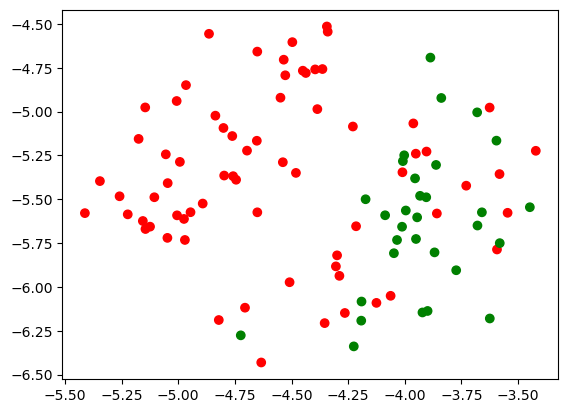

In [38]:
fig = plt.figure()
colors=[ 'g' if positive>negative else 'r' for positive,negative in zip(frame.positive.values,frame.negative.values)]
ax = plt.axes()
ax.scatter(X_dostoevsky[:,0], X_dostoevsky[:,1], c=colors)
plt.draw()
# for angle in range(0, 360):
#    ax.view_init(angle, 30)
#    plt.draw()
#    plt.pause(.001)

plt.show()